In [1]:
from torchvision.datasets import Cityscapes

import torch
print(torch.__version__)
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
import sys

2.1.2


In [2]:
print('__Python VERSION: ', sys.version)
print('__PyTorch VERSION: ', torch.__version__)
print('__CUDA VERSION', )
print('__CUDNN VERSION:', torch.backends.cudnn.version())
print('__Number CUDA Devices:', torch.cuda.device_count())
print('__Devices')
print('Active CUDA Device: GPU', torch.cuda.current_device())
print('Available devices ', torch.cuda.device_count())
print('Current cuda device ', torch.cuda.current_device())

__Python VERSION:  3.8.18 (default, Sep 11 2023, 13:39:12) [MSC v.1916 64 bit (AMD64)]
__PyTorch VERSION:  2.1.2
__CUDA VERSION
__CUDNN VERSION: 8700
__Number CUDA Devices: 1
__Devices
Active CUDA Device: GPU 0
Available devices  1
Current cuda device  0


In [3]:
# Check if GPU is avaliable on your system
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Training on {device}")

Training on cuda


In [4]:
import torchvision.transforms as transforms
import augmentations as A

# Define the transformations
data_transforms = transforms.Compose([
    transforms.ToTensor(),  # Convert PIL Image to PyTorch Tensor
    transforms.Resize((256,256))
])

# Define a list of transformations
augment_tranmforms = [A.Resize((256, 256)),
                    A.RandomHorizontalFlip(),
                    A.RandomRotation(degrees=(-35, 35)),
                    A.RandomCropWithProbability(220, 0.5),
                    A.ToTensor()]

# Instanciate the Compose class with the list of transformations
augment_transforms = A.Compose(augment_tranmforms)


dataset_path = 'C:\\Users\\jakub\\Desktop\\TUe\\AIES\\Q3\\5LSM0-Neural-networks-for-computer-vision\\FinalAssignment\\archive'

# Create transformed train dataset
training_dataset = Cityscapes(dataset_path, split='train', mode='fine', target_type='semantic', transform=data_transforms, target_transform=data_transforms)

# Create augmented train dataset
augmented_dataset = Cityscapes(dataset_path, split='train', mode='fine', target_type='semantic', transform=data_transforms, target_transform=augment_transforms)

# Create transformed train dataset
validation_dataset = Cityscapes(dataset_path, split='val', mode='fine', target_type='semantic', transform=data_transforms, target_transform=data_transforms)

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(4, 2, figsize=(10, 15))

for i in range(4):
    # TO DO: spec the fig size
    img, lbl = training_dataset[i]

    img_np = img.permute(1, 2, 0)
    lbl_np = lbl.permute(1, 2, 0)

    plt.subplot(4, 2, 2 * i + 1)
    plt.imshow(img_np)
    plt.title(f'RGB Image {i+1}')

    plt.subplot(4, 2, 2 * i + 2)
    plt.imshow(lbl_np)  # Adjust the colormap as needed
    plt.title(f'Semantic Segmentation Label {i+1}')

# Adjust layout to prevent overlap
# plt.tight_layout()
    
# Save a figure to a PNG format file
# plt.savefig('Cityspace-test-vis.png')

plt.show()

In [5]:
from torch.utils.data import ConcatDataset, DataLoader, random_split

# Combine the datasets
combined_dataset = ConcatDataset([training_dataset, augmented_dataset])

# Determine the lengths of the training and validation sets
total_size = len(combined_dataset)
train_size = int(0.8 * total_size)  # 80% for training
val_size = total_size - train_size  # 20% for validation

# Split the datasets
train_dataset, val_dataset = random_split(combined_dataset, [train_size, val_size])

# Create the dataloaders
# train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2, 
#                                 pin_memory=True if torch.cuda.is_available() else False)
# val_dataloader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=2, 
#                                 pin_memory=True if torch.cuda.is_available() else False)

In [6]:
# # Create training and validation dataloaders
train_loader = torch.utils.data.DataLoader(training_dataset, batch_size=2, shuffle=True)

val_loader = torch.utils.data.DataLoader(validation_dataset, batch_size=2, shuffle=True)


In [7]:
# Create a test dataset
# Create transformed train dataset
test_dataset = Cityscapes(dataset_path, split='test', mode='fine', target_type='semantic', transform=data_transforms, target_transform=data_transforms)
# Create a test data loader
# test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=2, shuffle=True, num_workers=2,
#                                             pin_memory=True if torch.cuda.is_available() else False)

#### Baseline UNet with CE

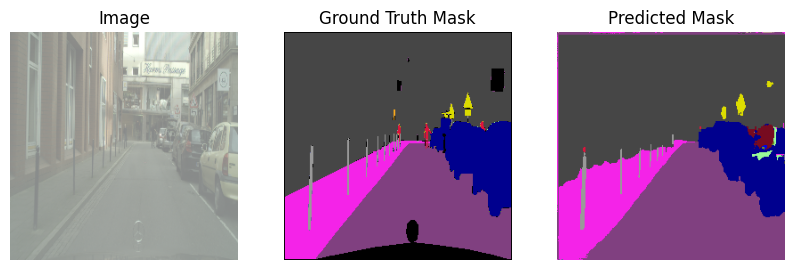

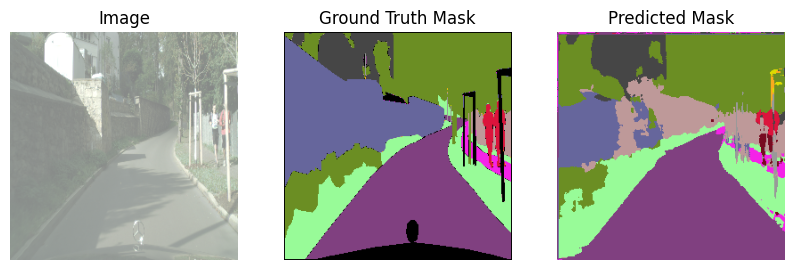

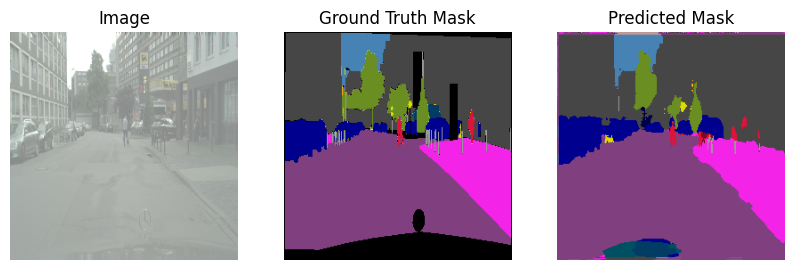

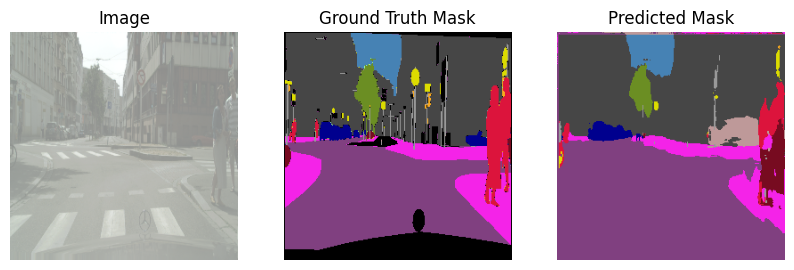

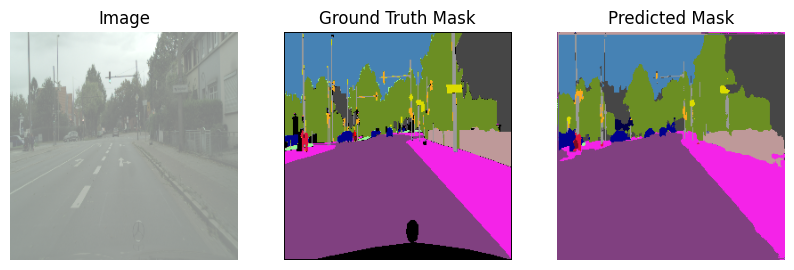

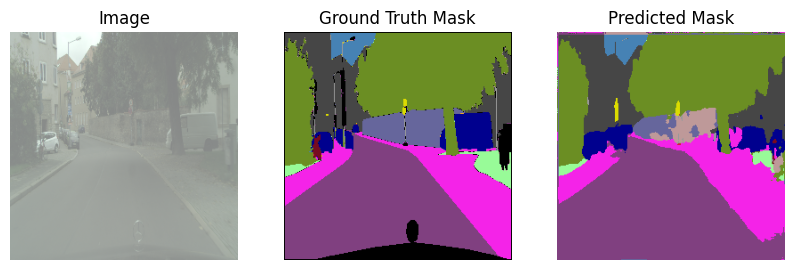

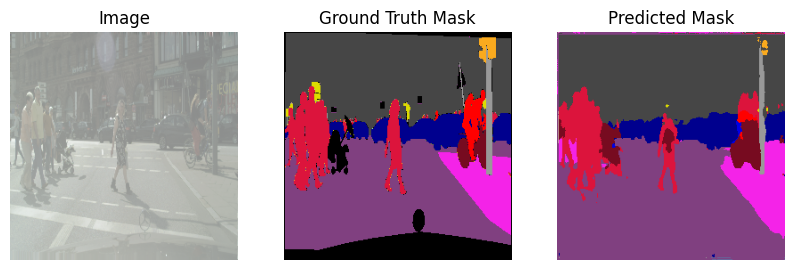

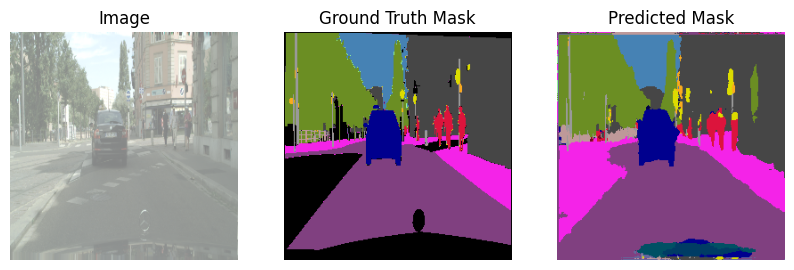

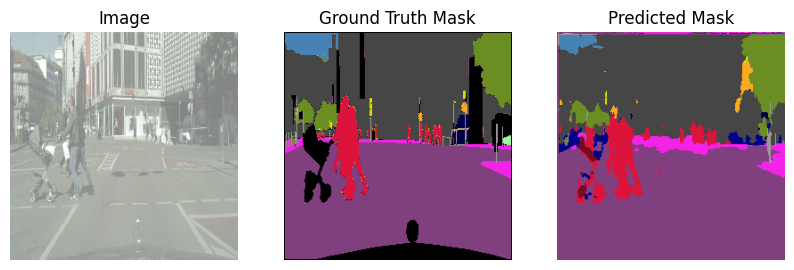

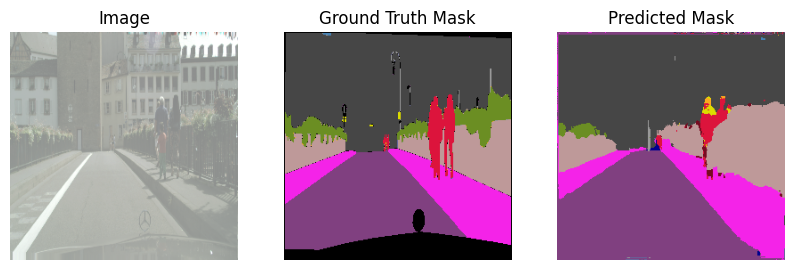

In [15]:
from model import Model
# from models import MSU_Net
# from RCNN_UNet import R2U_Net
from model_vis import visualize_segmentation_cityscapes

# Instanciate Model()
eval_model = Model()

# Specify the checkpoint file path
checkpoint_path = 'C:\\Users\\jakub\\Desktop\\TUe\\AIES\\Q3\\5LSM0-Neural-networks-for-computer-vision\\FinalAssignment\\model_checkpoints\\model_e50_26Mar.pth'
device = torch.device('cpu') 

checkpoint = torch.load(checkpoint_path, map_location=device)
eval_model.load_state_dict(checkpoint)

# Call the function with the checkpoint path
visualize_segmentation_cityscapes(eval_model, train_loader, num_examples=5)

#### Residual UNet (Res-UNet) with CE

Bridge shape:  torch.Size([2, 512, 32, 32])


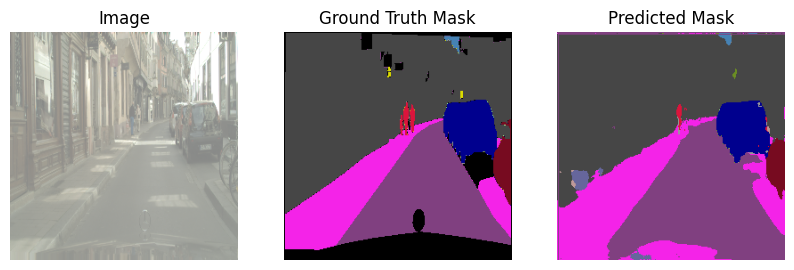

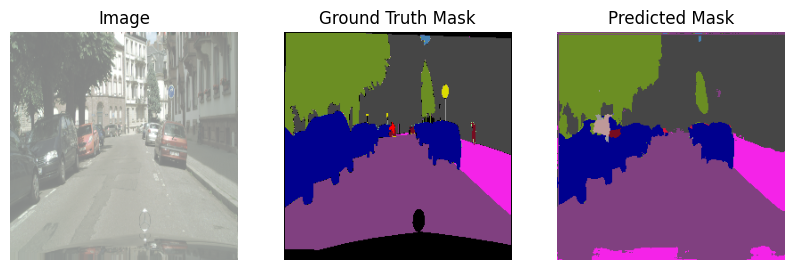

Bridge shape:  torch.Size([2, 512, 32, 32])


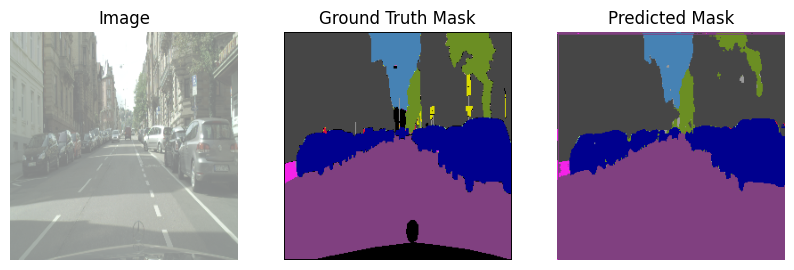

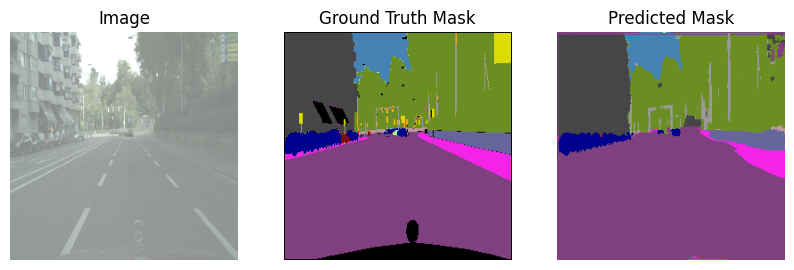

Bridge shape:  torch.Size([2, 512, 32, 32])


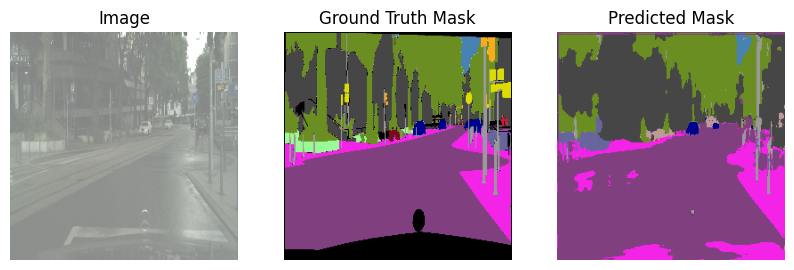

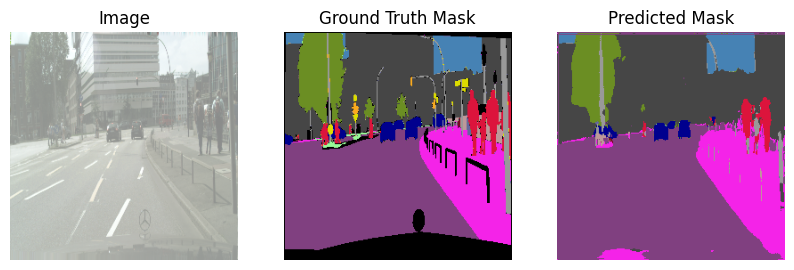

Bridge shape:  torch.Size([2, 512, 32, 32])


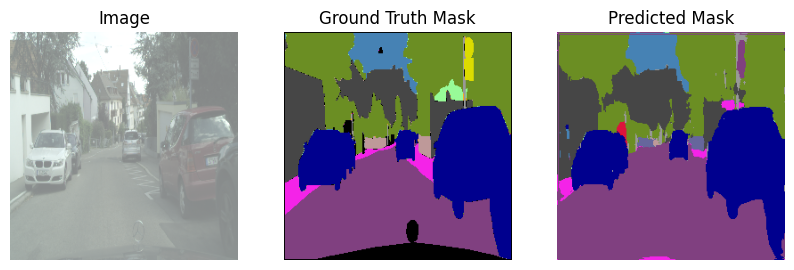

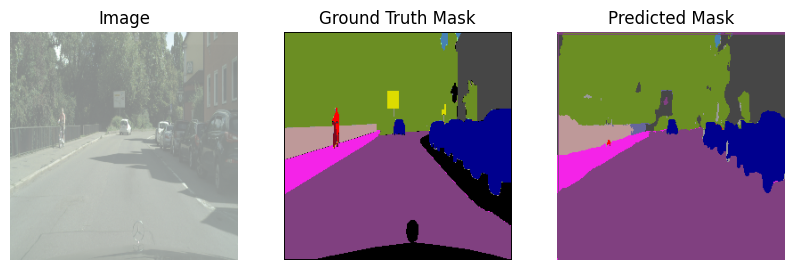

Bridge shape:  torch.Size([2, 512, 32, 32])


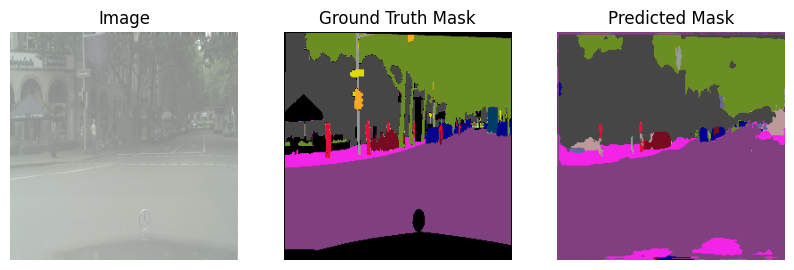

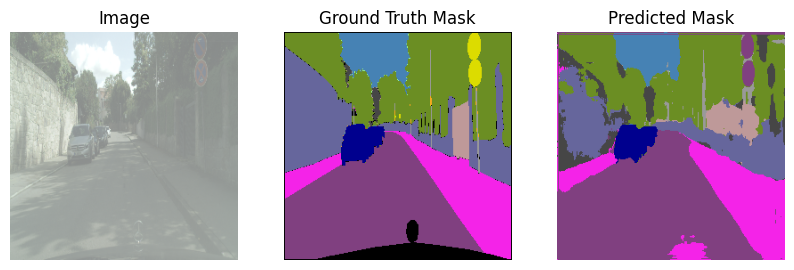

In [24]:
from model import Model
# from models import MSU_Net
from ResUNet import ResUNet
from model_vis import visualize_segmentation_cityscapes

# Instanciate Model()
eval_model = ResUNet()

# Specify the checkpoint file path
checkpoint_path = 'C:\\Users\\jakub\\Desktop\\TUe\\AIES\\Q3\\5LSM0-Neural-networks-for-computer-vision\\FinalAssignment\\model_checkpoints\\model_ResUNet_CE_e100.pth'
device = torch.device('cpu') 

checkpoint = torch.load(checkpoint_path, map_location=device)
eval_model.load_state_dict(checkpoint)

# Call the function with the checkpoint path
visualize_segmentation_cityscapes(eval_model, train_loader, num_examples=5)

#### Baseline UNet with Focal Loss

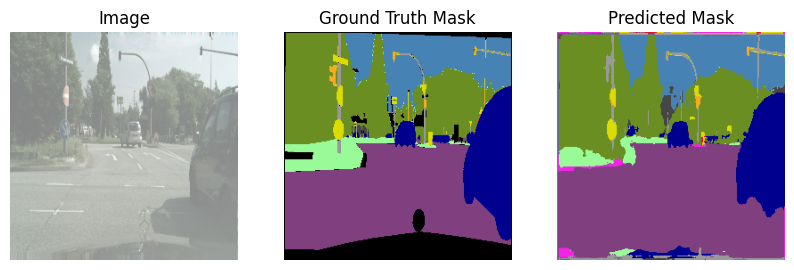

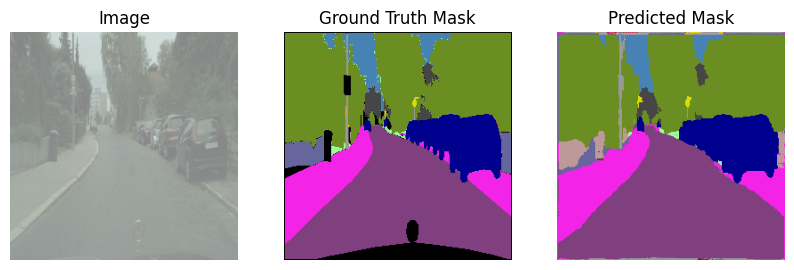

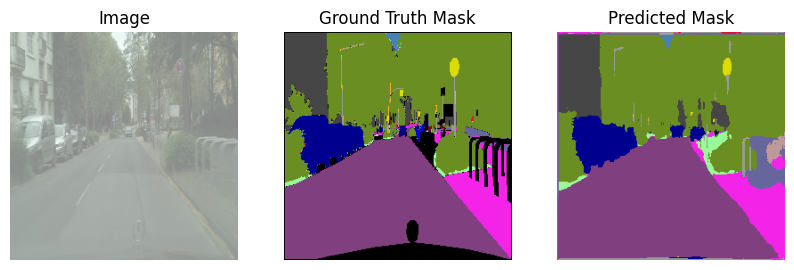

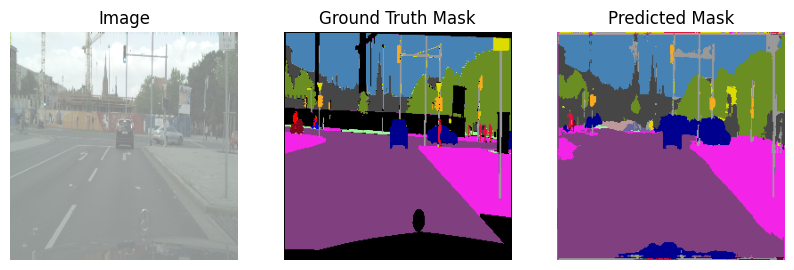

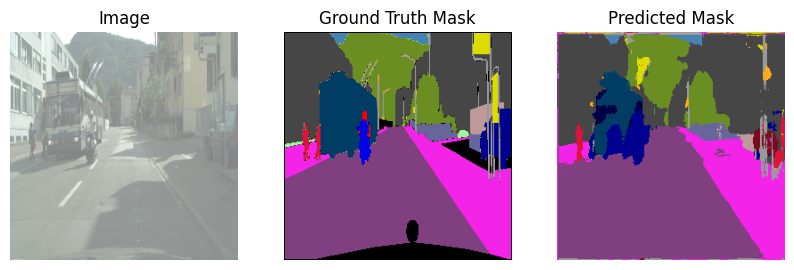

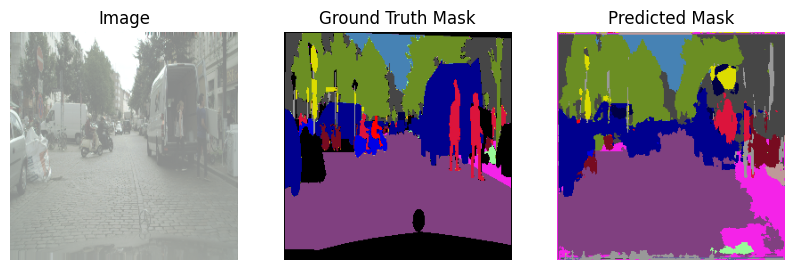

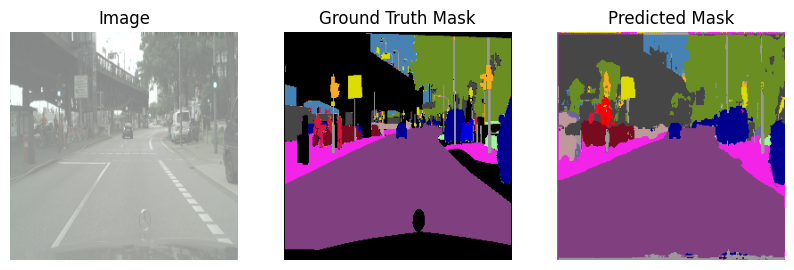

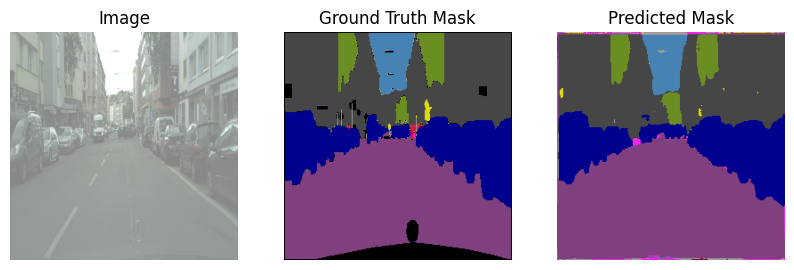

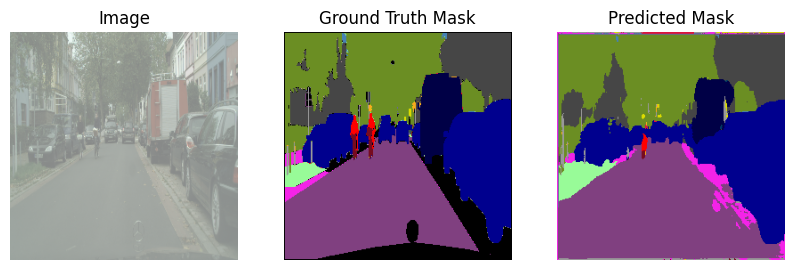

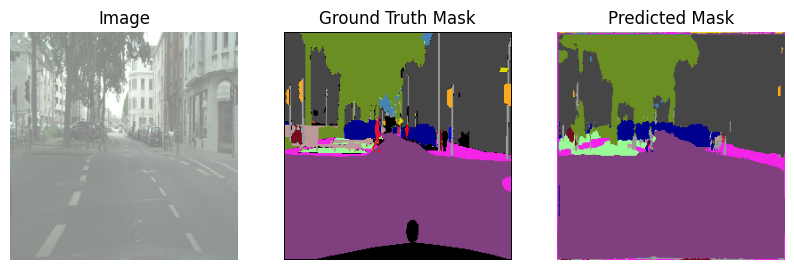

In [16]:
from model import Model
# from models import MSU_Net
# from RCNN_UNet import R2U_Net
from model_vis import visualize_segmentation_cityscapes

# Instanciate Model()
eval_model = Model()

# Specify the checkpoint file path
checkpoint_path = 'C:\\Users\\jakub\\Desktop\\TUe\\AIES\\Q3\\5LSM0-Neural-networks-for-computer-vision\\FinalAssignment\\model_checkpoints\\model_UNet_FL_e80.pth'
device = torch.device('cpu') 

checkpoint = torch.load(checkpoint_path, map_location=device)
eval_model.load_state_dict(checkpoint)

# Call the function with the checkpoint path
visualize_segmentation_cityscapes(eval_model, train_loader, num_examples=5)

### Training Model

In [ ]:
from model import Model
import model_executables as mex
from focal import FocalLoss

# Instanciate the model
UNet_model = Model()

# Move the model to the GPU if avaliable
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
UNet_model = UNet_model.to(device)

criterion = FocalLoss(ignore_index=255)
optimizer = optim.Adam(UNet_model.parameters(), lr=0.01)

# Train the instanciated model
mex.train_model(UNet_model, train_loader, val_loader, num_epochs=2, patience=3, criterion=criterion, optimizer=optimizer)

In [ ]:
# from models import MSU_Net
# import model_executables as mex

# # Instanciate the model
# UNet_model = MSU_Net()

# # Move the model to the GPU if avaliable
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# UNet_model = UNet_model.to(device)

# criterion = nn.CrossEntropyLoss(ignore_index=255)
# optimizer = optim.Adam(UNet_model.parameters(), lr=0.01)

# # Train the instanciated model
# mex.train_model(UNet_model, train_loader, val_loader, num_epochs=2, patience=3, criterion=criterion, optimizer=optimizer)

In [ ]:
# from RCNN_UNet import R2U_Net

# # Instanciate the model
# UNet_model = R2U_Net()

# # Move the model to the GPU if avaliable
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# UNet_model = UNet_model.to(device)

# criterion = nn.CrossEntropyLoss(ignore_index=255)
# optimizer = optim.Adam(UNet_model.parameters(), lr=0.01)

# # Train the instanciated model
# mex.train_model(UNet_model, train_loader, val_loader, num_epochs=2, patience=3, criterion=criterion, optimizer=optimizer)

In [ ]:
# Load in the checkpoint file and saving a new one with soely the model.state_dict

# Instanciate Model()
# model = Model()

# Specify the checkpoint file path
# checkpoint_path = 'C:\\Users\\jakub\\Desktop\\TUe\\AIES\\Q3\\5LSM0-Neural-networks-for-computer-vision\\FinalAssignment\\model_checkpoints\\model_checkpoint_epoch_50.pth'
# device = torch.device('cpu') 

# checkpoint = torch.load(checkpoint_path, map_location=device)
# model.load_state_dict(checkpoint['model_state_dict'])

# torch.save(model.state_dict(), 'C:\\Users\\jakub\\Desktop\\TUe\\AIES\\Q3\\5LSM0-Neural-networks-for-computer-vision\\FinalAssignment\\model_checkpoints\\model.pth')